In [1]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from tensorflow import keras
from tensorflow.keras import layers

# 載入 Boston Housing 數據集
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# 預處理數據
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# 設定不同的 batch size 與 epochs
batch_sizes = [4, 16, 32]
epochs_list = [40, 80, 120]

# 儲存實驗結果
results = []

for batch_size in batch_sizes:
    for epochs in epochs_list:
        # 建立模型
        model = keras.Sequential([
            layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)),
            layers.Dense(64, activation="relu"),
            layers.Dense(1)
        ])
        model.compile(optimizer="rmsprop",
                      loss="mse",
                      metrics=["mae"])
        
        # 訓練並計時
        start_time = time.time()
        history = model.fit(train_data, train_targets, epochs=epochs, batch_size=batch_size, verbose=0)
        end_time = time.time()
        
        # 預測並計算評估指標
        test_predictions = model.predict(test_data).flatten()
        test_loss, test_mae = model.evaluate(test_data, test_targets, verbose=0)
        
        test_rmse = np.sqrt(test_loss)  # 計算 RMSE
        test_mape = np.mean(np.abs((test_targets - test_predictions) / test_targets)) * 100  # 計算 MAPE
        train_time = end_time - start_time
        
        # 記錄結果
        results.append([batch_size, epochs, train_time, test_mae, test_rmse, test_mape])
        print(f"Batch: {batch_size}, Epochs: {epochs}, Time: {train_time:.2f}s, MAE: {test_mae:.4f}, RMSE: {test_rmse:.4f}, MAPE: {test_mape:.2f}%")

Batch: 4, Epochs: 40, Time: 8.37s, MAE: 2.6186, RMSE: 4.3209, MAPE: 13.43%
Batch: 4, Epochs: 80, Time: 19.85s, MAE: 2.4320, RMSE: 3.7517, MAPE: 12.56%
Batch: 4, Epochs: 120, Time: 28.93s, MAE: 2.7557, RMSE: 4.2163, MAPE: 14.39%
Batch: 16, Epochs: 40, Time: 3.24s, MAE: 2.8117, RMSE: 4.5894, MAPE: 14.49%
Batch: 16, Epochs: 80, Time: 6.37s, MAE: 2.6322, RMSE: 4.1516, MAPE: 13.55%
Batch: 16, Epochs: 120, Time: 8.89s, MAE: 2.5435, RMSE: 4.1819, MAPE: 12.84%
Batch: 32, Epochs: 40, Time: 1.76s, MAE: 3.0505, RMSE: 4.8652, MAPE: 15.42%
Batch: 32, Epochs: 80, Time: 2.48s, MAE: 2.6821, RMSE: 4.2903, MAPE: 13.56%
Batch: 32, Epochs: 120, Time: 3.69s, MAE: 2.5230, RMSE: 3.8608, MAPE: 12.25%


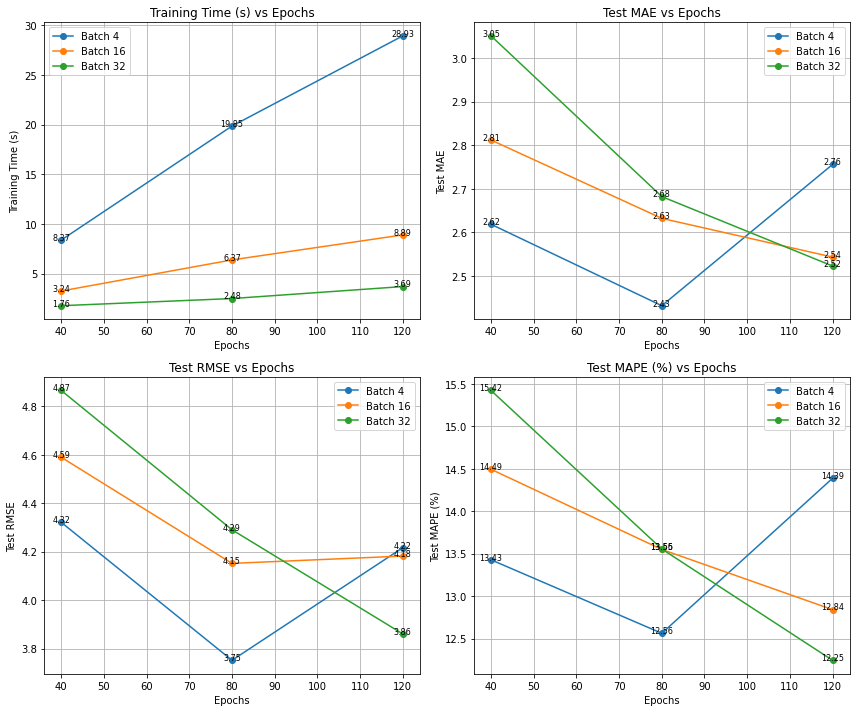

In [2]:
# 轉換結果為 NumPy 陣列以利繪圖
results = np.array(results)

# 繪圖並存成圖片
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
metric_labels = ["Training Time (s)", "Test MAE", "Test RMSE", "Test MAPE (%)"]
file_names = ["training_time.png", "test_mae.png", "test_rmse.png", "test_mape.png"]

for i in range(4):
    ax = axes[i // 2, i % 2]
    for batch_size in batch_sizes:
        subset = results[results[:, 0] == batch_size]  # 過濾相同 batch size 的數據
        ax.plot(subset[:, 1], subset[:, i+2], marker='o', label=f"Batch {batch_size}")

        # 新增數值標示
        for j, txt in enumerate(subset[:, i+2]):  
            ax.annotate(f'{txt:.2f}', (subset[j, 1], txt), fontsize=8, ha='center', color='black')

    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric_labels[i])
    ax.set_title(metric_labels[i] + " vs Epochs")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig("all_metrics.png", dpi=300)  # 存成一張包含 4 個圖的總圖
plt.show()

# 存成 4 張單獨的圖片
for i in range(4):
    plt.figure(figsize=(6, 5))
    for batch_size in batch_sizes:
        subset = results[results[:, 0] == batch_size]
        plt.plot(subset[:, 1], subset[:, i+2], marker='o', label=f"Batch {batch_size}")

        for j, txt in enumerate(subset[:, i+2]):
            plt.annotate(f'{txt:.2f}', (subset[j, 1], txt), fontsize=8, ha='center', color='black')

    plt.xlabel("Epochs")
    plt.ylabel(metric_labels[i])
    plt.title(metric_labels[i] + " vs Epochs")
    plt.legend()
    plt.grid(True)
    
    plt.savefig(file_names[i], dpi=300)  # 存成單獨的圖片
    plt.close()  # 避免顯示多張圖